Séparation des données en X (caractéristiques) et y (cible)
les models a mettre en palace sachant que c'est le trafic a predire est c'est un chifre donc les modeles sont les suivant:
    *regression ligniere
    *random forst
    *grandient boostin (XGBoost)

In [155]:
import pandas as pd
import numpy as np

#importer le dataset
dataf=pd.read_csv("data_final.csv",sep=",")
dataf

,Rang,Trafic,Année,Trafic_Année_Précedente,Réseau_Métro,Réseau_RER,Station_code
0,12,12.269711,2013,4.779338,1,0,238
1,19,9.541406,2013,4.779338,1,0,225
2,20,9.385220,2013,4.779338,1,0,241
3,39,7.092775,2013,4.779338,1,0,136
4,41,6.987958,2013,4.779338,1,0,192
...,...,...,...,...,...,...,...
3317,39,2.121720,2021,1.586673,0,1,115
3318,40,1.993503,2021,1.546784,0,1,347
3319,58,0.530706,2021,0.389736,0,1,166
3320,65,0.383626,2021,0.286202,0,1,244


In [156]:
# separation y=target et x=caracteristique 
X=dataf.drop(columns=["Trafic"])
y=dataf["Trafic"]
print("les caracteristique sont \n ",X)
print("la target\n ",y)

les caracteristique sont 
        Rang  Année  Trafic_Année_Précedente  Réseau_Métro  Réseau_RER  \
0       12   2013                 4.779338             1           0   
1       19   2013                 4.779338             1           0   
2       20   2013                 4.779338             1           0   
3       39   2013                 4.779338             1           0   
4       41   2013                 4.779338             1           0   
...    ...    ...                      ...           ...         ...   
3317    39   2021                 1.586673             0           1   
3318    40   2021                 1.546784             0           1   
3319    58   2021                 0.389736             0           1   
3320    65   2021                 0.286202             0           1   
3321    66   2021                 0.213256             0           1   

      Station_code  
0              238  
1              225  
2              241  
3              136  
4 

In [157]:
dataf.shape

(3322, 7)

 Diviser avec validation croise /la crosse validation elle s'occupe de cette séparation automatiquement. car je n'est pas un grand nombre de ligne 


In [158]:
#faire tous les importation necessaire pour mettre en pace les modeles
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import make_scorer, mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


la regression linéar

In [159]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [160]:
X.shape

(3322, 6)

In [161]:
y.shape

(3322,)

In [162]:
y=np.reshape(y,(-1,1))
y.shape

(3322, 1)

a cause des grandes valeurs des colonnes Trafic et Trafic_Année_Précedente lorsque je fais applique mon modele la valeur de l'erreure quadratique et trop eleve donc j'ai procede a divise les valeurs de ces deux collone par une valeurs fixe qui est 1 million 

erreur qouadratique de degree 1 est 10.035290247991727
le score du model qaund le de degree est 1 est  0.6552281633247978
erreur qouadratique de degree 2 est 8.112171123940138
le score du model qaund le de degree est 2 est  0.7212987299112661
erreur qouadratique de degree 3 est 7.843370896409628
le score du model qaund le de degree est 3 est  0.7305336145886626


<function matplotlib.pyplot.show(close=None, block=None)>

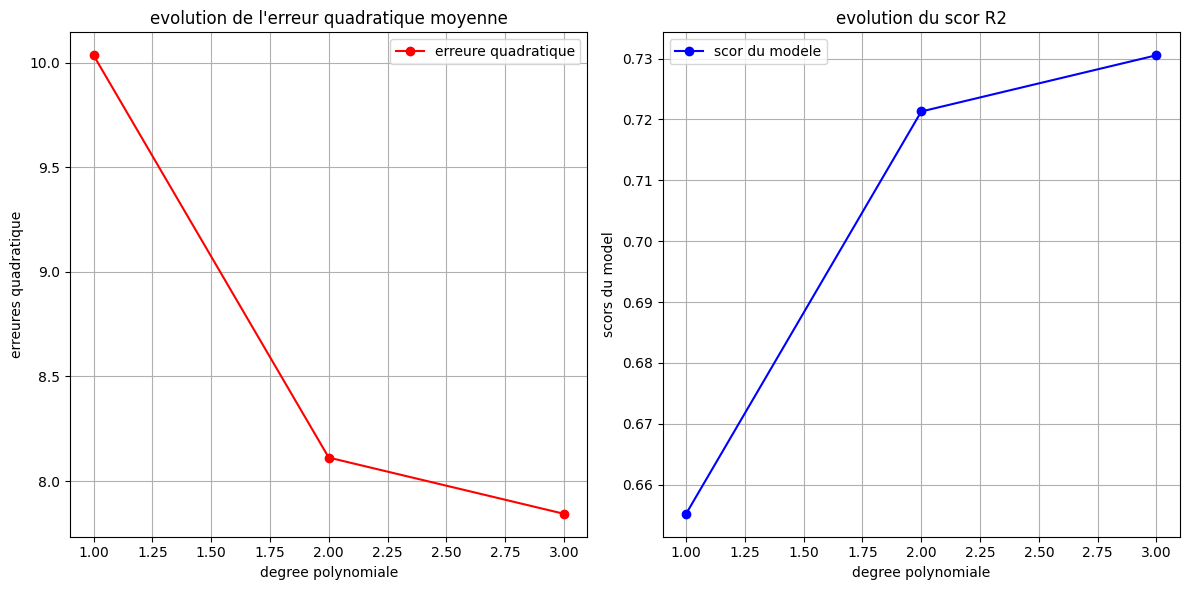

In [166]:
#ajoute une variable pour teste les degre de 1 a 5
degrees=range(1,4)

#stocke les valeur de l'erreure quadratique et les scores du model toute en ougmantant le degree 
mse_value=[]
r2_value=[]

#faire une boucle qui vas me permettre de tests les differente degre du polynome 

for degree in degrees:
    poly=PolynomialFeatures(degree=degree,include_bias=False,interaction_only=True)
    X_train_poly=poly.fit_transform(X_train)
    X_test_poly=poly.transform(X_test)

    #entrainement du modele 
    model=LinearRegression()
    model.fit(X_train_poly,y_train)

    #faire la prediction sur les donées de test
    y_pred=model.predict(X_test_poly)

    #evaluer le model
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    print("erreur qouadratique de degree",degree, "est",mse)
    print("le score du model qaund le de degree est" ,degree, "est ",r2)

    #ajoute les valeur aux liste 
    mse_value.append(mse)
    r2_value.append(r2)
#trace les courbes 
plt.figure(figsize=(12,6))

#la courbe de l'erreure quadratique 
plt.subplot(1,2,1)
plt.plot(degrees,mse_value,label="erreure quadratique",color='red',marker='o')
plt.title("evolution de l'erreur quadratique moyenne")
plt.xlabel("degree polynomiale")
plt.ylabel("erreures quadratique")
plt.grid(True)
plt.legend()

#la courbe du score
plt.subplot(1,2,2)
plt.plot(degrees,r2_value,label="scor du modele",color='blue',marker='o')
plt.title("evolution du scor R2")
plt.xlabel("degree polynomiale")
plt.ylabel("scors du model")
plt.grid(True)
plt.legend()

#affichage des graphe
plt.tight_layout()
plt.show

pour ameliore les perforamnce de mon modele et les pouce au MAX j'ai procede:
    1- a augmante le degree de mon model car j'ai constate il a une form "polynomiale"
        =>Pour visualiser l'amélioration de mon modèle en termes d'erreur quadratique moyenne (MSE) et de scor R2 j'ai tracer des courbes pour chaque métrique('erreur quadratique moyenne (MSE) / scor R2) en augmantant le degre du mldel jsuqua au degree 6
    2- cahnge l'hyperparametre alpha et en visulise les resultats 


pour alpha est  1e-06  mse => 10.035290247996322  r2=> 0.65522816332464
pour alpha est  4.641588833612782e-05  mse => 10.035290248204484  r2=> 0.6552281633174883
pour alpha est  0.0021544346900318843  mse => 10.035290257865384  r2=> 0.6552281629855791
pour alpha est  0.1  mse => 10.035290704636374  r2=> 0.6552281476363415
pour alpha est  4.641588833612782  mse => 10.035307910480872  r2=> 0.6552275565133682
pour alpha est  215.44346900318865  mse => 10.030182470746787  r2=> 0.6554036458169379
pour alpha est  10000.0  mse => 9.424890439560222  r2=> 0.6761990229470431


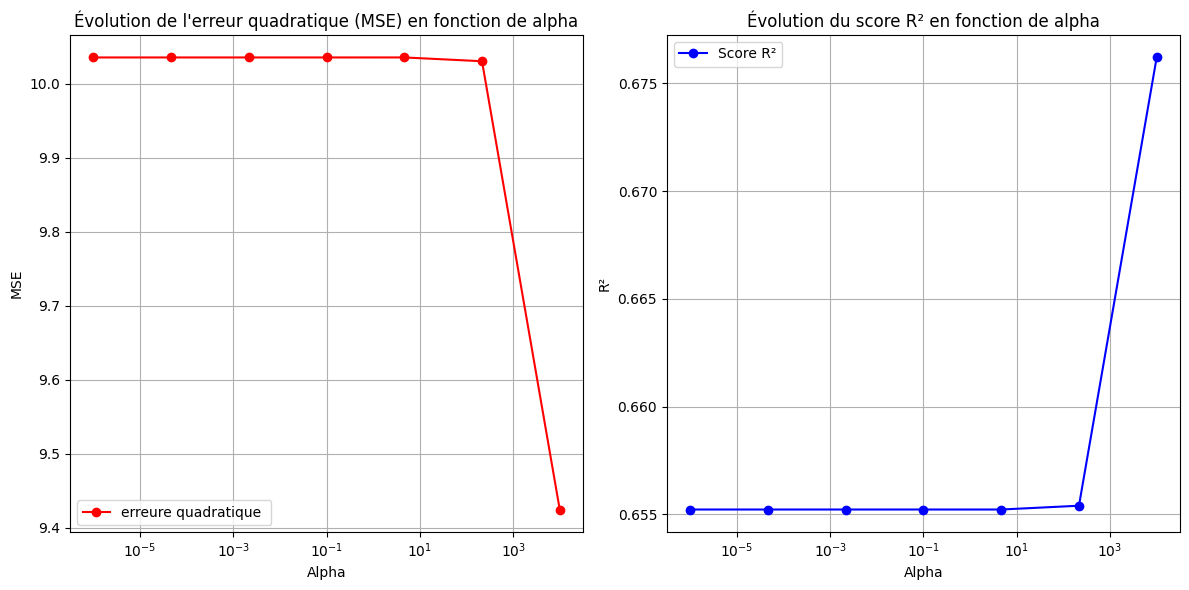

In [164]:
alphas=np.logspace(-6,4,7)
mse_values=[]
r2_values=[]

#boucle pour tests les differente valeur de alpha 
for alpha in alphas:
    model=Ridge(alpha=alpha)
    model.fit(X_train,y_train)

    y_pred=model.predict(X_test)

    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)

    mse_values.append(mse)
    r2_values.append(r2)
    print("pour alpha est ",alpha," mse =>",mse," r2=>",r2)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.semilogx(alphas,mse_values,label="erreure quadratique ",color='red',marker='o')
plt.title("Évolution de l'erreur quadratique (MSE) en fonction de alpha")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.grid(True)
plt.legend()


# Courbe du score R²
plt.subplot(1, 2, 2)
plt.semilogx(alphas, r2_values, label="Score R²", color='blue', marker='o')
plt.title("Évolution du score R² en fonction de alpha")
plt.xlabel("Alpha")
plt.ylabel("R²")
plt.grid(True)
plt.legend()

# Afficher les graphiques
plt.tight_layout()
plt.show()